In [433]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
from scipy import stats
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
from sklearn import linear_model, datasets
from matplotlib import pyplot
import datetime

In [434]:
dftit = pd.read_csv('C:/users/justi/Desktop/DataSets/train.csv')

In [435]:
dftit.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [436]:
dftit.set_index('Name', inplace = True)

In [437]:
dftit.groupby(['Sex','Embarked', 'Pclass']).mean()[['Fare']]

Fare
Sex    Embarked Pclass            
female C        1       115.640309
                2        25.268457
                3        14.694926
       Q        1        90.000000
                2        12.350000
                3        10.307833
       S        1        99.026910
                2        21.912687
                3        18.670077
male   C        1        93.536707
                2        25.421250
                3         9.352237
       Q        1        90.000000
                2        12.350000
                3        11.924251
       S        1        52.949947
                2        19.232474
                3        13.307149

In [438]:
values = dftit[['Survived', 'Pclass', 'Sex', 'Embarked']]

In [439]:
for data in values.columns.tolist():
    print(data)
    print(values[data].value_counts())

Survived
0    549
1    342
Name: Survived, dtype: int64
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [440]:
dftit[['Survived' , 'Pclass', 'Sex']].groupby(['Sex', 'Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [441]:
dftit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [442]:
dftit[['Survived' , 'Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [443]:
dftit[dftit['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Icard, Miss. Amelie",62,1,1,female,38.0,0,0,113572,80.0,B28,NaN
"Stone, Mrs. George Nelson (Martha Evelyn)",830,1,1,female,62.0,0,0,113572,80.0,B28,NaN


In [444]:
dftit[(dftit['Sex'] =='female') & (dftit['Age'] > 35) & (dftit['Pclass'] == 1) & (dftit['Fare'] >= 80)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Icard, Miss. Amelie",62,1,1,female,38.0,0,0,113572,80.0000,B28,NaN
"Lurette, Miss. Elise",196,1,1,female,58.0,0,0,PC 17569,146.5208,B80,C
"Graham, Mrs. William Thompson (Edith Junkins)",269,1,1,female,58.0,0,1,PC 17582,153.4625,C125,S
"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",300,1,1,female,50.0,0,1,PC 17558,247.5208,B58 B60,C
"Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)",320,1,1,female,40.0,1,1,16966,134.5000,E34,C
"Young, Miss. Marie Grice",326,1,1,female,36.0,0,0,PC 17760,135.6333,C32,C
"Burns, Miss. Elizabeth Margaret",338,1,1,female,41.0,0,0,16966,134.5000,E40,C
"Bidois, Miss. Rosalie",381,1,1,female,42.0,0,0,PC 17757,227.5250,NaN,C
"Thayer, Mrs. John Borland (Marian Longstreth Morris)",582,1,1,female,39.0,1,1,17421,110.8833,C68,C


In [445]:
dftit['Embarked'].replace(np.nan,'C', inplace = True)

In [446]:
dftit[(dftit['Sex'] =='male') & (dftit['Pclass'] == 3)].mean()[['Age']]

C:\Users\justi\AppData\Local\Temp\ipykernel_24076\1291102320.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dftit[(dftit['Sex'] =='male') & (dftit['Pclass'] == 3)].mean()[['Age']]


Age    26.507589
dtype: float64

In [447]:
dftit[(dftit['Age'].isnull()) & (dftit['Sex'] =='male')]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"Williams, Mr. Charles Eugene",18,1,2,male,NaN,0,0,244373,13.0000,NaN,S
"Emir, Mr. Farred Chehab",27,0,3,male,NaN,0,0,2631,7.2250,NaN,C
"Todoroff, Mr. Lalio",30,0,3,male,NaN,0,0,349216,7.8958,NaN,S
"Mamee, Mr. Hanna",37,1,3,male,NaN,0,0,2677,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
"Marechal, Mr. Pierre",840,1,1,male,NaN,0,0,11774,29.7000,C47,C
"Sage, Mr. Douglas Bullen",847,0,3,male,NaN,8,2,CA. 2343,69.5500,NaN,S
"Razi, Mr. Raihed",860,0,3,male,NaN,0,0,2629,7.2292,NaN,C


In [448]:
dftit['Cabin_Letter'] = dftit['Cabin'].astype(str).str[0] 

In [449]:
dftit.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [450]:
dftit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Letter'],
      dtype='object')

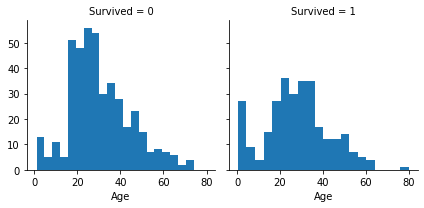

In [451]:
g = sns.FacetGrid(dftit, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<AxesSubplot:title={'center':'Pclass = 3 | Survived = 1'}, xlabel='Sex', ylabel='Survived'>

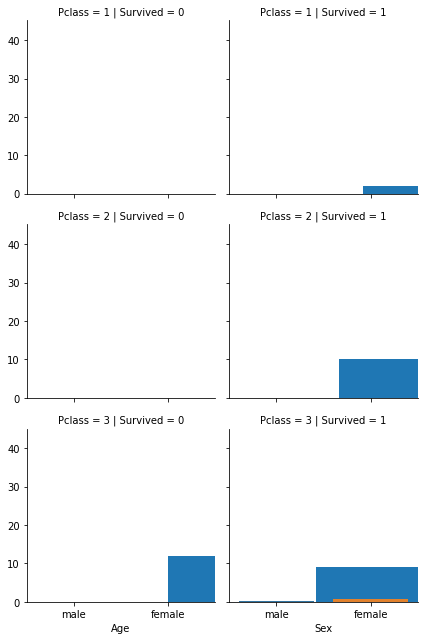

In [452]:
f = sns.FacetGrid(dftit, col='Survived', row = 'Pclass')
f.map(plt.hist, 'Age', bins=20) 
sns.barplot(x = 'Sex', y = 'Survived', data = dftit)

(0.0, 537.94566)

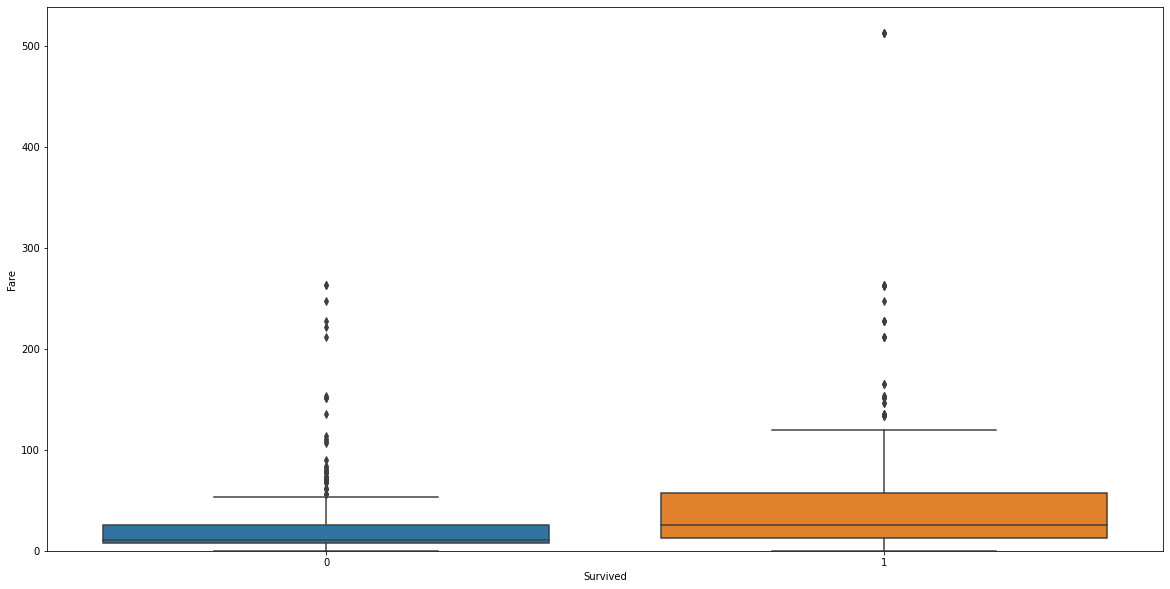

In [453]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sqftliving_regplot = sns.boxplot(x = 'Survived', y = 'Fare', data = dftit,ax=ax)
plt.ylim(0,)

(0.0, 83.979)

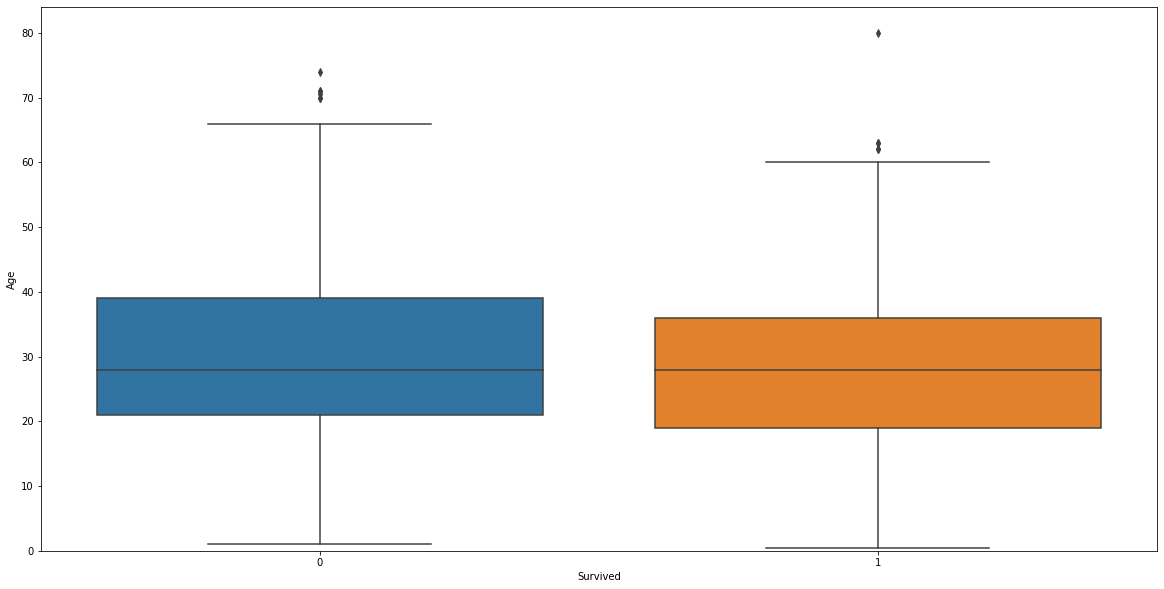

In [454]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sqftliving_regplot = sns.boxplot(x = 'Survived', y = 'Age', data = dftit,ax=ax)
plt.ylim(0,)

In [455]:
dftit[dftit['Cabin_Letter']=='n']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,n
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,n
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,n
...,...,...,...,...,...,...,...,...,...,...,...,...
"Sutehall, Mr. Henry Jr",885,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,n
"Rice, Mrs. William (Margaret Norton)",886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q,n
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,n


In [456]:
dftit['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [457]:
dftit.replace('n', np.nan, inplace = True)

In [458]:
dftit['Cabin_Letter'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_Letter, dtype: int64

In [459]:
dftit.groupby(['Sex','Pclass','Cabin_Letter']).count()[['Survived']]

Survived
Sex    Pclass Cabin_Letter          
female 1      A                    1
              B                   27
              C                   27
              D                   16
              E                   10
       2      D                    2
              E                    4
              F                    4
       3      E                    1
              F                    1
              G                    4
male   1      A                   14
              B                   20
              C                   32
              D                   13
              E                   15
              T                    1
       2      D                    2
              F                    4
       3      E                    2
              F                    4

In [460]:
letter_dict = dftit['Cabin_Letter'].value_counts().to_dict()

In [461]:
letter_dict

{'C': 59, 'B': 47, 'D': 33, 'E': 32, 'A': 15, 'F': 13, 'G': 4, 'T': 1}

In [462]:
letter_values_sum = sum(letter_dict.values())

In [463]:
for number in letter_dict.values():
    letter_percentage = number/letter_values_sum
    number_of_letters = letter_percentage * 687
    print(round(number_of_letters))

199
158
111
108
51
44
13
3


In [464]:
new_letter_dict = {}
for key in letter_dict.items():
    letter_percentage = key[1]/letter_values_sum
    number_of_letters = letter_percentage * 687
    rounded_num_of_letters = round(number_of_letters)
    v = ({key[0]:rounded_num_of_letters})
    new_letter_dict.update(v)

In [465]:
for key in new_letter_dict.items():
    dftit['Cabin_Letter'].fillna(key[0], limit = key[1], inplace = True)

In [466]:
for key in new_letter_dict.items():
    print(key)

('C', 199)
('B', 158)
('D', 111)
('E', 108)
('A', 51)
('F', 44)
('G', 13)
('T', 3)


In [467]:
dftit['Cabin_Letter'].value_counts()

C    258
B    205
D    144
E    140
A     66
F     57
G     17
T      4
Name: Cabin_Letter, dtype: int64

In [468]:
dftit.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Cabin_Letter      0
dtype: int64

In [469]:
groups = list(dftit.groupby(["Sex", "Pclass"]))

In [470]:
for key, frame in groups: # gets the mean age of the non na values and then places those averages with those that have na values
    mean_age = frame["Age"].mean()
    frame["Age"] = frame["Age"].where(frame["Age"].notna(), mean_age)

In [471]:
new_df = pd.concat(frame for key, frame in groups)

In [472]:
new_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Cabin_Letter      0
dtype: int64

In [473]:
age_groups = [0,1,2,3,4]
fare_groups = [0,1,2,3,4]

In [474]:
bins = np.linspace(min(new_df['Age']), max(new_df['Age']),6)

In [475]:
fare_bins = np.linspace(min(new_df['Fare']), max(new_df['Fare']), 6)

In [476]:
new_df['Fare_Group'] = pd.cut(new_df['Fare'], bins = fare_bins, labels = fare_groups, include_lowest = True)

In [477]:
new_df['Age_Group'] = pd.cut(new_df['Age'], bins, labels = age_groups, include_lowest = True)

In [478]:
new_df['Fare_Group'] = new_df['Fare_Group'].astype(int)

In [479]:
new_df['Age_Group'] = new_df['Age_Group'].astype(int)

In [480]:
new_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_Group,Age_Group
PassengerId,1.000000,-0.005007,-0.035144,0.039636,-0.057527,-0.001652,0.012658,0.020746,0.022969
Survived,-0.005007,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,0.165780,-0.036384
Pclass,-0.035144,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,-0.347834,-0.419593
Age,0.039636,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,0.055007,0.943699
SibSp,-0.057527,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,0.022148,-0.228661
Parch,-0.001652,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,0.139083,-0.151666
Fare,0.012658,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,0.907337,0.145876
Fare_Group,0.020746,0.165780,-0.347834,0.055007,0.022148,0.139083,0.907337,1.000000,0.080135
Age_Group,0.022969,-0.036384,-0.419593,0.943699,-0.228661,-0.151666,0.145876,0.080135,1.000000


In [481]:
dummy_variable_1 = pd.get_dummies(new_df['Sex'])

In [482]:
new_df = pd.concat([new_df, dummy_variable_1], axis = 1)

In [483]:
new_df.drop(['PassengerId', 'Sex', 'Cabin', 'Ticket','Embarked'], axis = 1, inplace = True)

In [484]:
Cabin_groups = [0,1,2,3,4,5,6,7]

In [485]:
new_df.dtypes

Survived          int64
Pclass            int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Cabin_Letter     object
Fare_Group        int32
Age_Group         int32
female            uint8
male              uint8
dtype: object

In [486]:
cabin_letter_list = []
for i in new_df['Cabin_Letter'].unique():
    cabin_letter_list.append(i)

In [487]:
cabin_letter_list

['C', 'B', 'D', 'E', 'A', 'F', 'G', 'T']

In [488]:
cabin_groups_dict = dict(zip(cabin_letter_list, Cabin_groups))

In [489]:
cabin_groups_dict

{'C': 0, 'B': 1, 'D': 2, 'E': 3, 'A': 4, 'F': 5, 'G': 6, 'T': 7}

In [490]:
for key in cabin_groups_dict.items():
     new_df['Cabin_Letter'] = new_df['Cabin_Letter'].replace(key[0],key[1])

In [491]:
new_df.dtypes

Survived          int64
Pclass            int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Cabin_Letter      int64
Fare_Group        int32
Age_Group         int32
female            uint8
male              uint8
dtype: object

In [492]:
new_df['Cabin_Letter'].value_counts()

0    258
1    205
2    144
3    140
4     66
5     57
6     17
7      4
Name: Cabin_Letter, dtype: int64

In [493]:
new_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_Letter,Fare_Group,Age_Group,female,male
Survived,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,-0.045696,0.165780,-0.036384,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,0.084956,-0.347834,-0.419593,-0.131900,0.131900
Age,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,-0.023516,0.055007,0.943699,-0.112851,0.112851
SibSp,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,-0.050380,0.022148,-0.228661,0.114631,-0.114631
Parch,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,0.018770,0.139083,-0.151666,0.245489,-0.245489
Fare,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,-0.136820,0.907337,0.145876,0.182333,-0.182333
Cabin_Letter,-0.045696,0.084956,-0.023516,-0.050380,0.018770,-0.136820,1.000000,-0.126505,-0.035539,-0.056324,0.056324
Fare_Group,0.165780,-0.347834,0.055007,0.022148,0.139083,0.907337,-0.126505,1.000000,0.080135,0.118639,-0.118639
Age_Group,-0.036384,-0.419593,0.943699,-0.228661,-0.151666,0.145876,-0.035539,0.080135,1.000000,-0.074045,0.074045
female,0.543351,-0.131900,-0.112851,0.114631,0.245489,0.182333,-0.056324,0.118639,-0.074045,1.000000,-1.000000


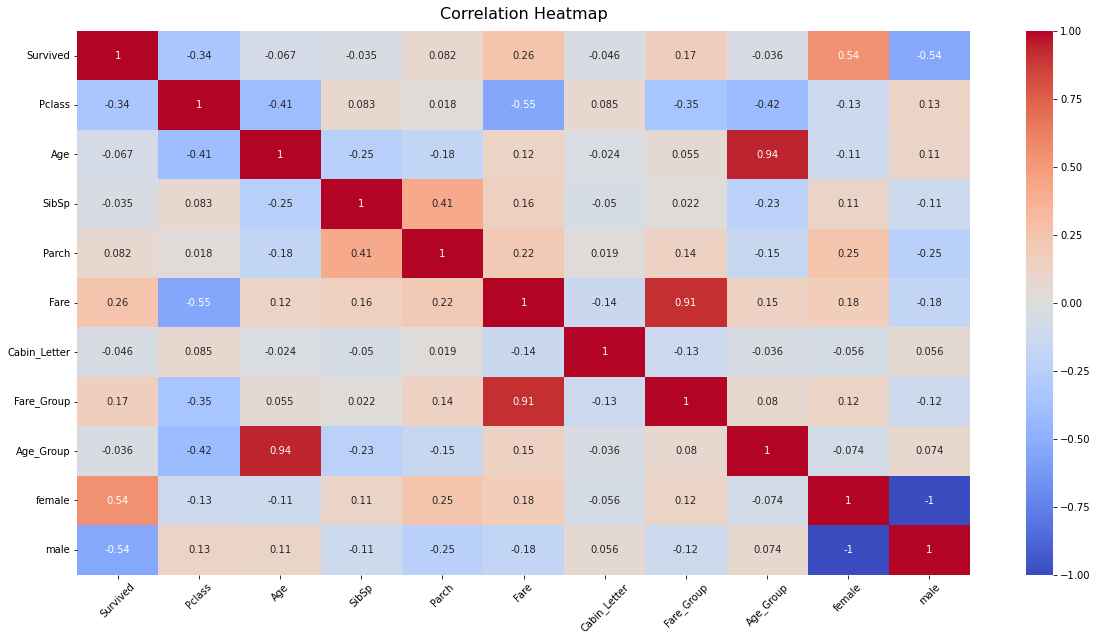

In [494]:
##correlation heatmap
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
heatmap = heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 45)

In [495]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [496]:
model= LinearRegression()

In [497]:
x = new_df[['male', 'female','Pclass', 'Age_Group', 'Fare_Group', 'Cabin_Letter']]

In [498]:
y = new_df['Survived']

In [499]:
model.fit(x, y)

LinearRegression()

In [500]:
model.score(x,y)

0.3834202356324743

In [501]:
result = sm.OLS(y,x).fit()
print(result.summary())
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     110.1
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.90e-90
Time:                        15:44:54   Log-Likelihood:                -406.49
No. Observations:                 891   AIC:                             825.0
Df Residuals:                     885   BIC:                             853.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
male             0.7597      0.062     12.207   

In [502]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_model = LogisticRegression(solver='liblinear', random_state=0)

In [503]:
log_model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [504]:
log_model.score(x,y)

0.7946127946127947

In [505]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.451124
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Jan 2022   Pseudo R-squ.:                  0.3225
Time:                        15:45:01   Log-Likelihood:                -401.95
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.545e-80
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
male             2.0495      0.421      4.870      0.000       1.225       2.874
female           4.6583

In [506]:
#Support Vector Machine
from sklearn import svm
model = svm.SVC(kernel='poly', degree=5)
model.fit(x, y)

SVC(degree=5, kernel='poly')

In [507]:
model.score(x,y)

0.8103254769921436